### Handling the missing values of Categorical values using Mode

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("E:/Python and ML/Dataset/train_1.csv",usecols= ['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

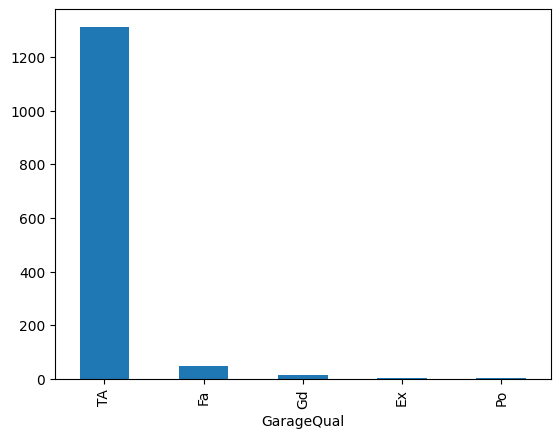

In [7]:
df["GarageQual"].value_counts().plot(kind ='bar')

In [8]:
df["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

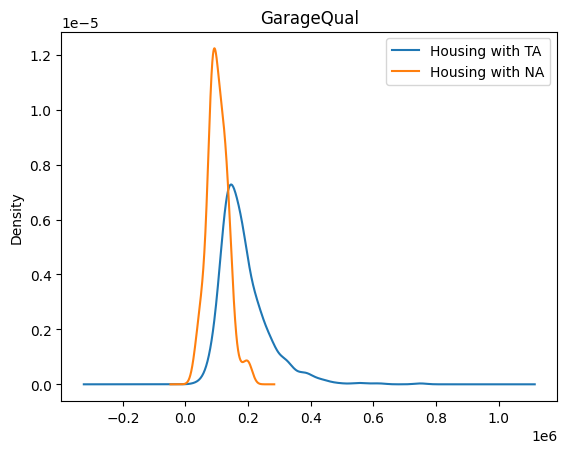

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = "kde", ax = ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = "kde", ax = ax)

lines, labels = ax.get_legend_handles_labels()

labels = ["Housing with TA", "Housing with NA"]
ax.legend(lines,labels,loc = "best")

plt.title("GarageQual")

In [10]:
temp = df[df["GarageQual"] == "TA"]["SalePrice"]

In [11]:
df["GarageQual"].fillna("TA", inplace = True)

<Axes: xlabel='GarageQual'>

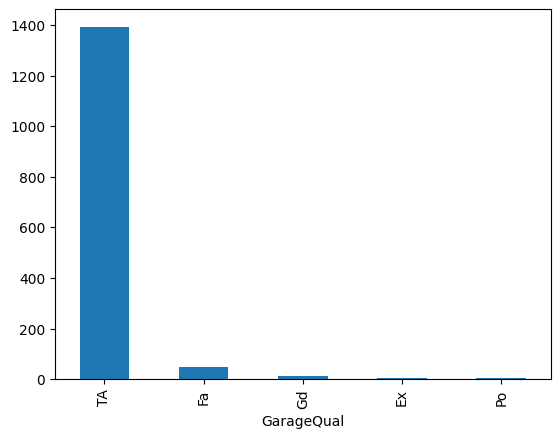

In [12]:
df["GarageQual"].value_counts().plot(kind = "bar")

Text(0.5, 1.0, 'GarageQual')

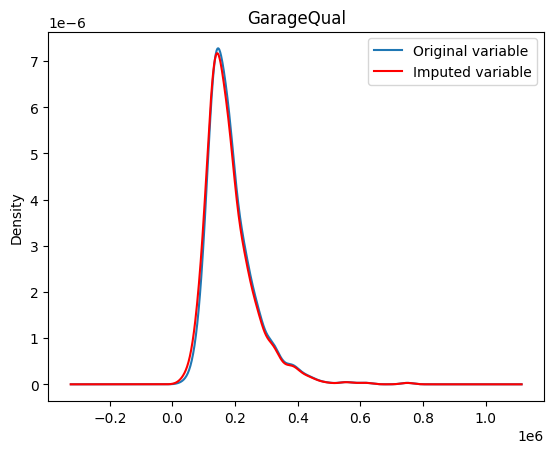

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

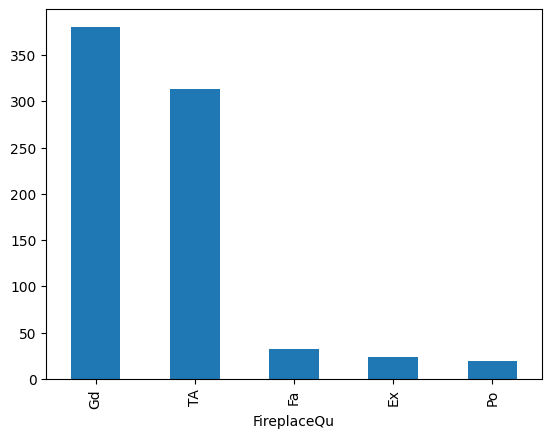

In [14]:

df['FireplaceQu'].value_counts().plot(kind='bar')

In [16]:

df['FireplaceQu'].mode()


0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

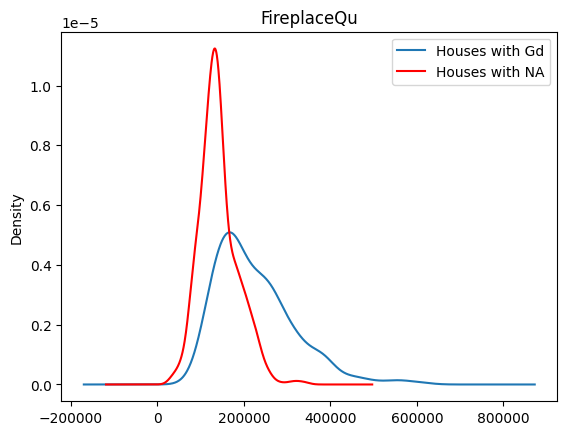

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [18]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [20]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

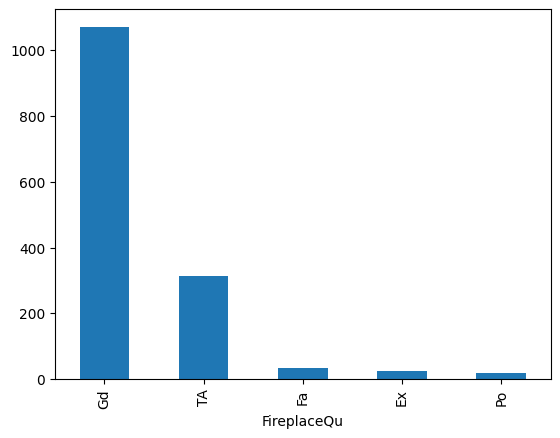

In [21]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

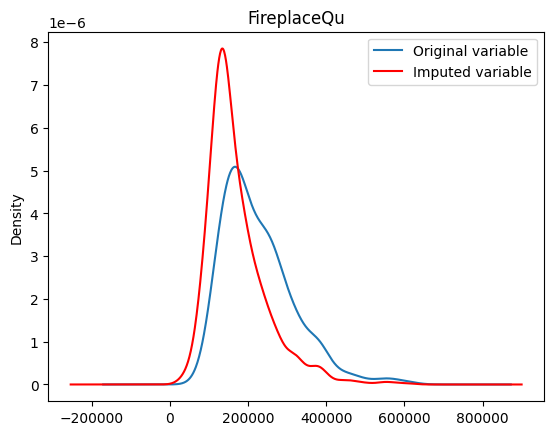

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

### using Sklearn 

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2, random_state=40)


In [25]:
from sklearn.impute import SimpleImputer


In [28]:
imputer = SimpleImputer(strategy="most_frequent")

In [29]:
X_train = imputer.fit_transform(X_train)